In [3]:
from tqdm.notebook import tqdm

import numpy as np, math

from scipy.stats import norm, kstest, expon, lognorm, cauchy, uniform

from scipy.integrate import quad

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Helper Functions

In [ ]:
# returns the pdf, mean function and variance function
def my_stats(name, loc, scale):
    

# Cauchy vs Normal Distribution
- see the plot below to visually observe why Cauchy distribution is said to have heavier tails than a normal distribution
- remember that the area under the curve of a Cauchy distribution is also 1 (since its a probability density function), so that isn't the issue.
    - its rather the function $(x-x_0)^2.f_{Cauchy}(x)$
- Cauchy distribution PDF: $ P(x) = \dfrac{1}{\pi\gamma}\dfrac{1}{1 + \left(\frac{x-x_0}{\gamma}\right)^2}$
- Expected value = $x_0$
    - $\mathbb{E}[X] = \int\limits_{-\infty}^{\infty} x.\dfrac{1}{\pi\gamma}\dfrac{1}{1 + \left(\frac{x-x_0}{\gamma}\right)^2} dX = \dfrac{1}{\pi\gamma}\int\limits_{-\infty}^{\infty} \dfrac{x}{1+\left(\frac{x-x_0}{\gamma}\right)^2} dX$
    - let $u = \frac{x-x_0}{\gamma} \Rightarrow du = \dfrac{1}{\gamma}dx \rightarrow dx = \gamma du \,,\, x = \gamma u + x_0$
    - $\mathbb{E}[X] =\dfrac{1}{\pi\gamma}\int\limits_{-\infty}^{\infty} \dfrac{\gamma u + x_0}{1+u^2} \gamma du = \dfrac{1}{\pi}\left(\int\limits_{-\infty}^{\infty}\dfrac{\gamma u}{1+u^2} du + \int\limits_{-\infty}^{\infty} \dfrac{x_0}{1+u^2} du\right)$
        - for the first integral
            - $y = u^2 \rightarrow dy = 2udu \rightarrow udu = \dfrac{dy}{2}$
            - $\int\dfrac{\gamma u}{1+u^2} du = \int \dfrac{\gamma dy}{2.(1+y)}dy = 2\gamma ln(1+y)| = 2\gamma ln(1+u^2)|_{-\infty}^{\infty} = 0$
        - for the second integral
            - $u = tan\theta \rightarrow du = sec^2\theta d\theta$
            - $\int \dfrac{x_0}{1+u^2} du = \int x_0 . cos^2\theta sec^2\theta d\theta = x_0.\theta | = \left[x_0.tan^{-1}(u)\right]^{\infty}_{-\infty} = x_0.\left(\dfrac{\pi}{2}-(-\dfrac{pi}{2})\right) = x_0\pi$
    - hence, $\mathbb{E}[X] = \dfrac{1}{\pi}.(x_0\pi + 0) = x_0$
- Variance Value = $\infty$
    - $\sigma^2 = \mathbb{E}[(X - \mathbb{E}[X])^2] = \int\limits_{-\infty}^{\infty} (x-x_0)^2.P(x).dx = \int\limits_{-\infty}^{\infty} (x-x_0)^2 \dfrac{1}{\pi\gamma}\dfrac{1}{1 + \left(\frac{x-x_0}{\gamma}\right)^2} dx = \dfrac{\gamma}{\pi}\int\limits_{-\infty}^{\infty} \dfrac{\left(\dfrac{x - x_0}{\gamma}\right)^2}{1 + \left(\dfrac{x - x_0}{\gamma}\right)^2} dx$
    - let $u = \dfrac{x - x_0}{\gamma} \rightarrow du = \dfrac{dx}{\gamma} \rightarrow dx = \gamma du$ , $\sigma^2 = \dfrac{\gamma}{\pi}\int\limits_{-\infty}^{\infty} \dfrac{u^2}{1+u^2}\gamma du = \dfrac{\gamma^2}{\pi}\int\limits_{-\infty}^{\infty} \dfrac{(1+u^2) - 1}{1+u^2} du = \dfrac{\gamma^2}{\pi}\int\limits_{-\infty}^{\infty} du + \dfrac{\gamma^2}{\pi}\int\limits_{-\infty}^{\infty} \dfrac{1}{1+u^2} du$
        - the second integral evaluates to $\pi$
        - the **first integral is infinity**, and hence the **variance of a cauchy distribution is non-finite**.

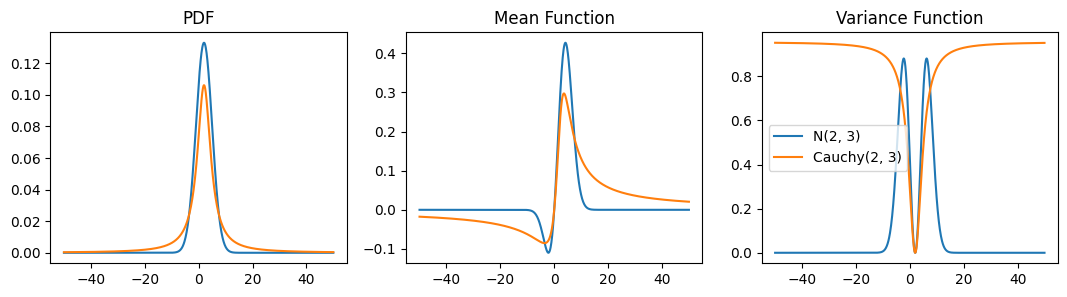

In [37]:
pts = np.linspace(-50, 50, 1000)

mu, sigma = 2, 3
x_0, gamma = 2, 3

normal_pdf_arr = norm.pdf(pts, loc=mu, scale=sigma)
cauchy_pdf_arr = cauchy.pdf(pts, loc=x_0, scale=gamma)

mean_function_normal = pts*normal_pdf_arr
mean_function_cauchy = pts*cauchy_pdf_arr

variance_function_normal = ((pts - mu) ** 2)*normal_pdf_arr
variance_function_cauchy = ((pts - x_0) ** 2)*cauchy_pdf_arr

fig, ax = plt.subplots(1, 3, figsize=(13, 3))

ax[0].plot(pts, normal_pdf_arr, label=f'N({mu}, {sigma})')
ax[0].plot(pts, cauchy_pdf_arr, label=f'Cauchy({x_0}, {gamma})')

ax[1].plot(pts, mean_function_normal, label=f'N({mu}, {sigma})')
ax[1].plot(pts, mean_function_cauchy, label=f'Cauchy({x_0}, {gamma})')

ax[2].plot(pts, variance_function_normal, label=f'N({mu}, {sigma})')
ax[2].plot(pts, variance_function_cauchy, label=f'Cauchy({x_0}, {gamma})')

ax[0].set_title('PDF');ax[1].set_title('Mean Function');ax[2].set_title('Variance Function')

plt.legend()
plt.show()

# Demonstrate CLT

Requirements of the i.i.d.:
1. Finite, Fixed population variance

The following are the distributions that obey this:
1. uniform distribution from `a` to `b`
2. exponential distribution, $P(X=x) = e^{-x} \, ,\, \forall \, x \ge 0$
3. Normal distribution

The following are the distributions that disobey this:
1. non-fixed but finite variance: 
    - lognormal
    - 
2. infinite variance: Cauchy Distribution


## Uniform Distribution
Observe that in the below graphs of uniform distribution for different values of sample sizes:
1. $\mathbb{E}\left[\bar{X}\right] = \mu$
2. $Var.(\bar{X}) = \dfrac{\sigma^2}{n}$
3. **Note**: the above two points were **not** part of CLT, they were rather i.i.d. based identities where the population has a fixed and finite mean and variance.
4. when calculating the KS statistic between the actual distribution of sample mean and the CLT-expected distribution
    - the KS statistic value is quite low (generally this is in 0 to 1)
    - the p-value is significant enough to not let us reject the null hypothesis.
    - the null hypothesis of a KS test is that the two distributions are identical

Note: While calculating variance across a batch of sample means, you wouldn't need Bessel correction because these sample mean values themselves are not constrained. The no. of sample means = no. of degrees of freedom = 500 in the case below.

For a population having a uniform distribution between -10 and 10:
 mean = 0.0, variance = 33.33333333333334


Randomly sampling 10 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<?,…

Randomly sampling 100 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<?…

Randomly sampling 1000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<…

Randomly sampling 10000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00…

Randomly sampling 100000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:0…

Randomly sampling 1000000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:…

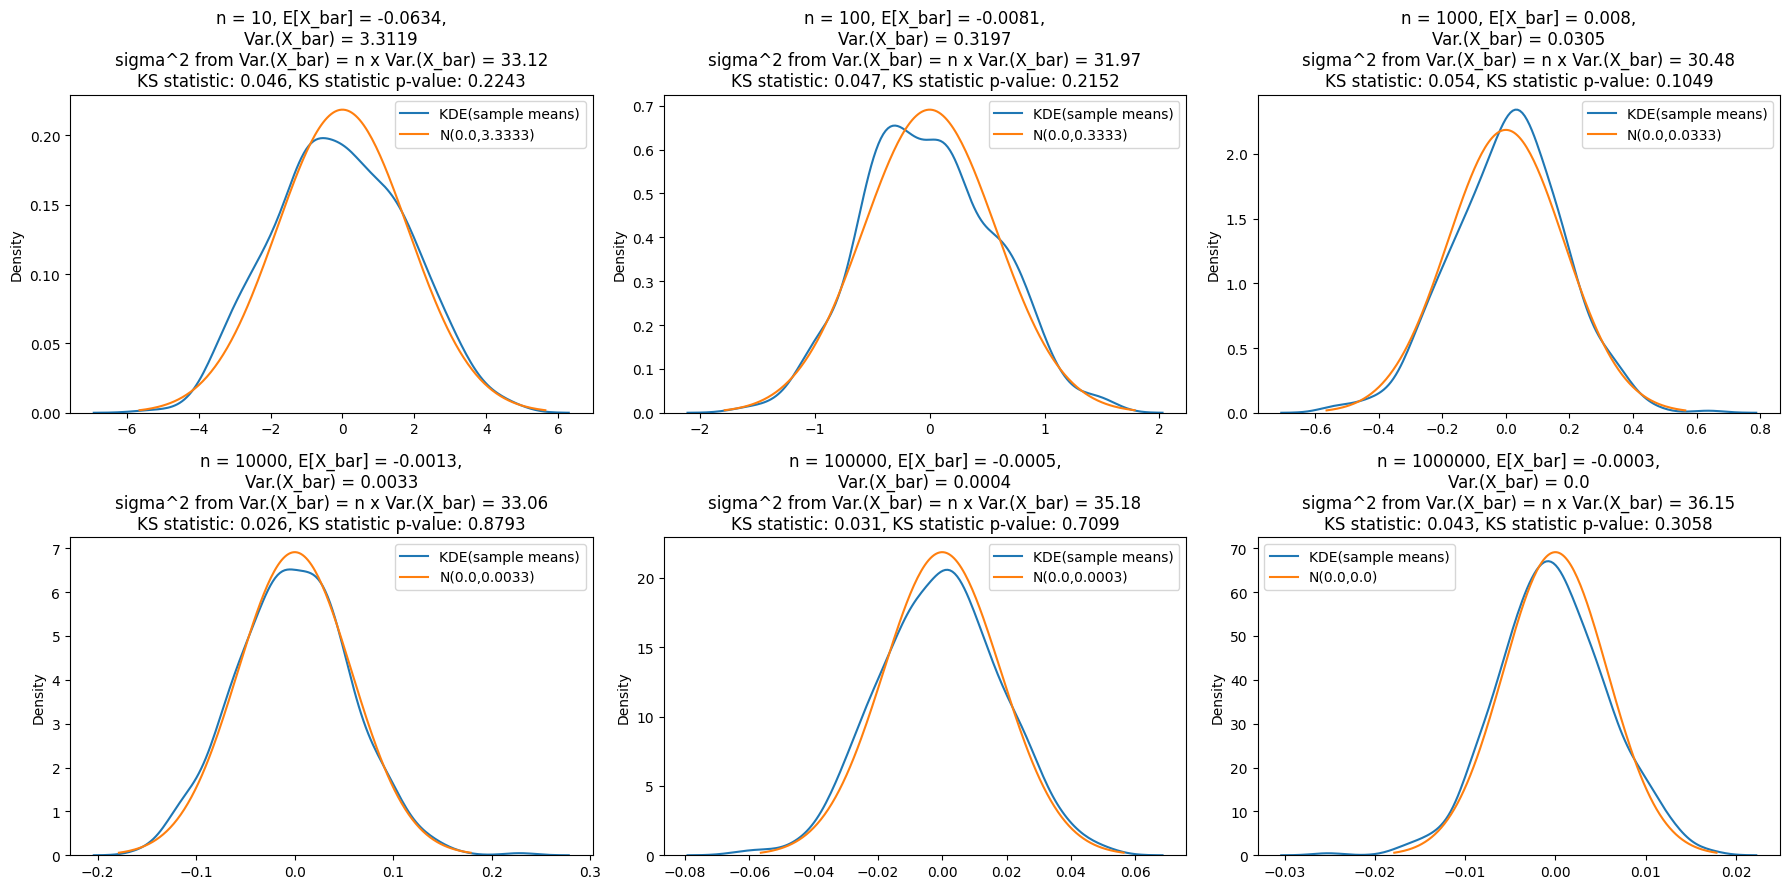

In [12]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# uniform distribution
uniform_a, uniform_b = -10, 10
uniform_mu, uniform_sigma = (uniform_a + uniform_b)/2, math.sqrt(((uniform_b-uniform_a) ** 2)/12)
print(f"For a population having a uniform distribution between {uniform_a} and {uniform_b}:"
    f"\n mean = {uniform_mu}, variance = {uniform_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using uniform({uniform_a}, {uniform_b}) + calculating sample mean"):
        sample_means.append(np.random.uniform(low = -10, high = 10, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = uniform_mu
    sample_mean_clt_std = uniform_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Exponential Distribution

1. standardized exponential distribution: $P(X = x) = \begin{cases} e^{-x} & x \ge 0 \\ 0 & \textrm{ otherwise } \end{cases}$
    1. for this, the population mean = 1, and the population variance = 1
2. scaled and shifted exponential distribution: $P(X = x) = \begin{cases} \frac{1}{\beta}e^{-(x-\alpha)/\beta} & x \ge \alpha \\ 0 & \textrm{ otherwise } \end{cases}$
    1. for this, $\mathbb{E}[X] = \mu = \alpha + \beta \,,\, \sigma = \sqrt{\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]} = \beta$
    2. **Note** that shifting isn't simply changing the threshold from 0 to $\alpha$, its actually changing the exponential function as well. the same goes for scaling.

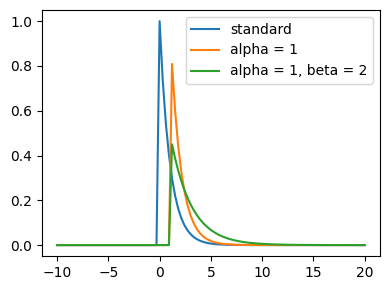

In [49]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_exp = expon.pdf(pts)
pts_prob_shifted_exp = expon.pdf(pts, loc=1)
pts_prob_scaled_shifted_exp_2 = expon.pdf(pts, loc=1, scale = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_exp, label='standard')
plt.plot(pts, pts_prob_shifted_exp, label='alpha = 1')
plt.plot(pts, pts_prob_scaled_shifted_exp_2, label='alpha = 1, beta = 2')

plt.legend()
plt.tight_layout()
plt.show()

For a population having an exponential distribution:
 mean = 5, variance = 9


Randomly sampling 10 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/500 …

Randomly sampling 100 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/500…

Randomly sampling 1000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/50…

Randomly sampling 10000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/5…

Randomly sampling 100000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/…

Randomly sampling 1000000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0…

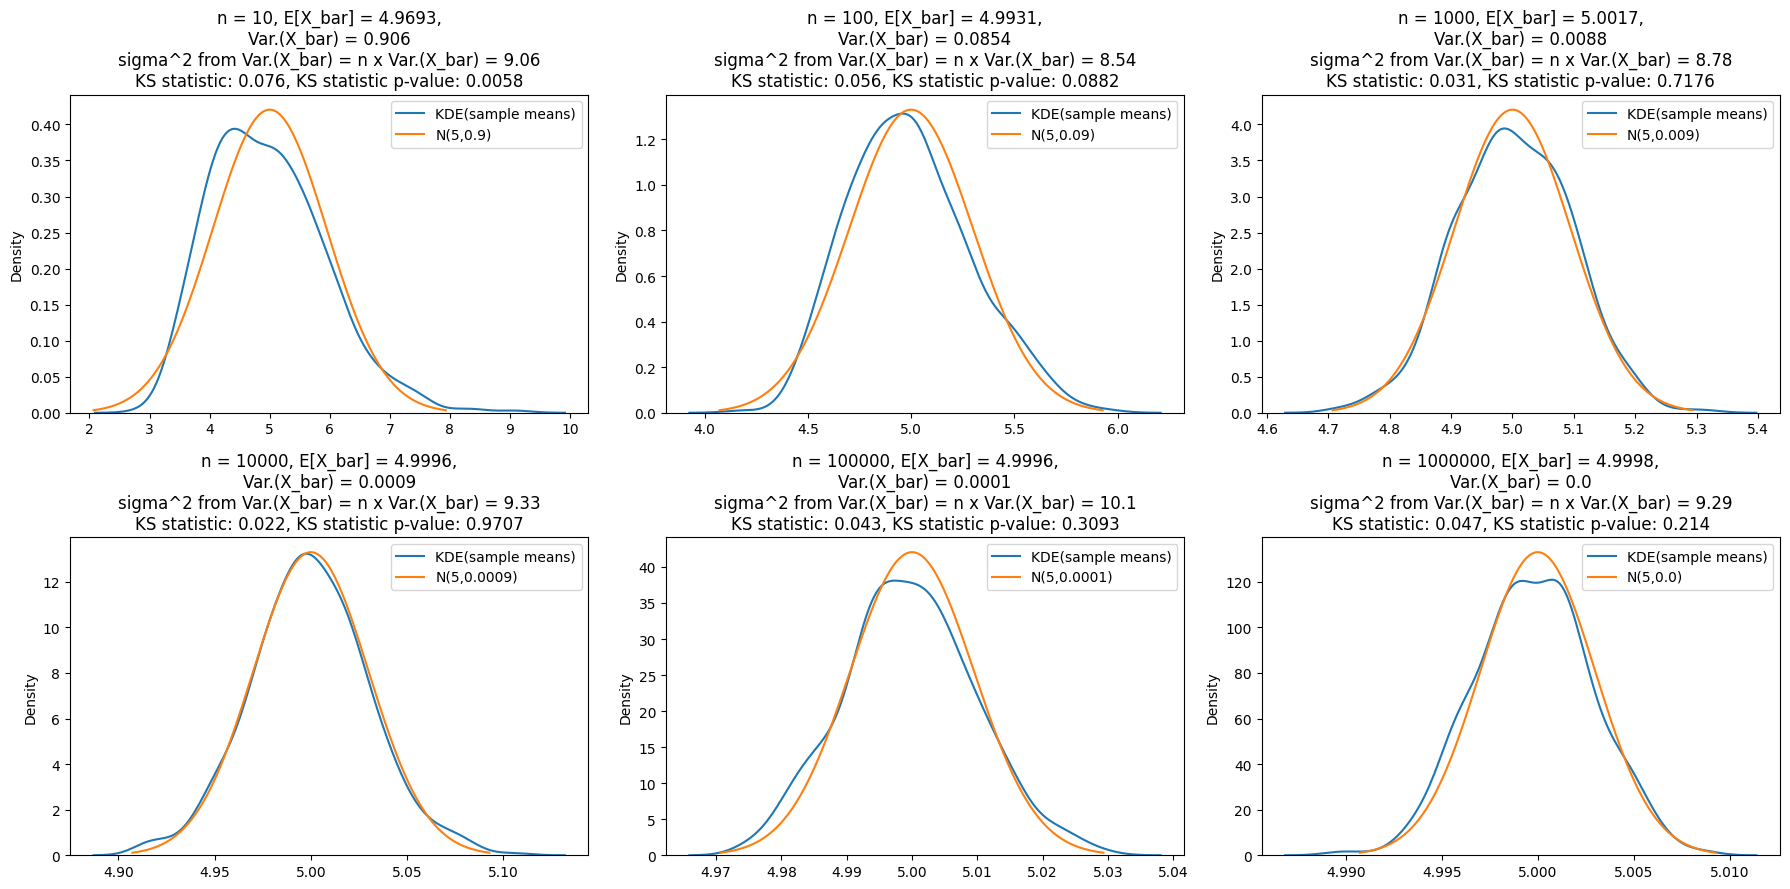

In [50]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
alpha, beta = 2, 3
expon_mu, expon_sigma = alpha + beta, beta
print(f"For a population having an exponential distribution:"
    f"\n mean = {expon_mu}, variance = {expon_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Expon(loc = {alpha}, scale = {beta}) + calculating sample mean"):
        sample_means.append(expon.rvs(loc = alpha, scale=beta, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = expon_mu
    sample_mean_clt_std = expon_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Log Normal distribution
- when the natural log of a random variable is normally distributed
- using $Y = ln(X) \textrm{ such that } f_Y(y) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\dfrac{(y-\mu')^2}{2\sigma'^2}} \Rightarrow f_X(x) = \dfrac{1}{x\sigma\sqrt{2\pi}} e^{-\dfrac{(ln(x)-\mu')^2}{2\sigma'^2}}$
    - $X = e^Y \rightarrow P(Y \le y) = P(X \le e^y) \Rightarrow f_Y(y) = \dfrac{d(P(X \le e^y))}{dy} = \dfrac{d(P(X \le e^y))}{dX}.\dfrac{dX}{dy} = f_X(x).e^y = f_X(x).x$
    - $f_Y(y) = f_X(x).x$
    - so if Y is normally distributed, $f_X(x) = \dfrac{1}{x}.f_Y(y) = \dfrac{1}{x\sigma\sqrt{2\pi}} e^{-\dfrac{(ln(x)-\mu')^2}{2\sigma'^2}} \quad (y = ln(x))$

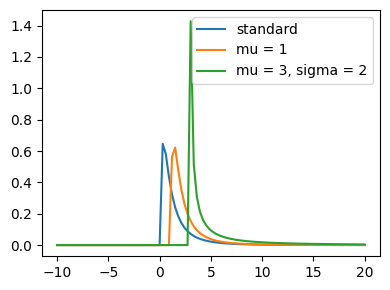

In [6]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_lognorm = lognorm.pdf(pts, s=1)
pts_prob_shifted_lognorm = lognorm.pdf(pts, loc=1, s=1)
pts_prob_scaled_shifted_lognorm_2 = lognorm.pdf(pts, loc=3, s = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_lognorm, label='standard')
plt.plot(pts, pts_prob_shifted_lognorm, label='mu = 1')
plt.plot(pts, pts_prob_scaled_shifted_lognorm_2, label='mu = 3, sigma = 2')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
mu, sigma = 3, 2
lognorm_mu, lognorm_sigma = alpha + beta, beta
print(f"For a population having an exponential distribution:"
    f"\n mean = {lognorm_mu}, variance = {lognorm_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Expon(loc = {alpha}, scale = {beta}) + calculating sample mean"):
        sample_means.append(expon.rvs(loc = alpha, scale=beta, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = lognorm_mu
    sample_mean_clt_std = lognorm_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Cauchy Distribution


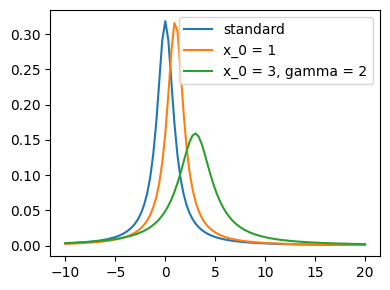

In [9]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_cauchy = cauchy.pdf(pts)
pts_prob_shifted_cauchy = cauchy.pdf(pts, loc=1)
pts_prob_scaled_shifted_cauchy_2 = cauchy.pdf(pts, loc=3, scale = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_cauchy, label='standard')
plt.plot(pts, pts_prob_shifted_cauchy, label='x_0 = 1')
plt.plot(pts, pts_prob_scaled_shifted_cauchy_2, label='x_0 = 3, gamma = 2')

plt.legend()
plt.tight_layout()
plt.show()

For a population having an exponential distribution:
 mean = 3, variance = inf


Randomly sampling 10 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/500…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 100 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/50…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 1000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/5…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 10000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 100000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 1000000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | …

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


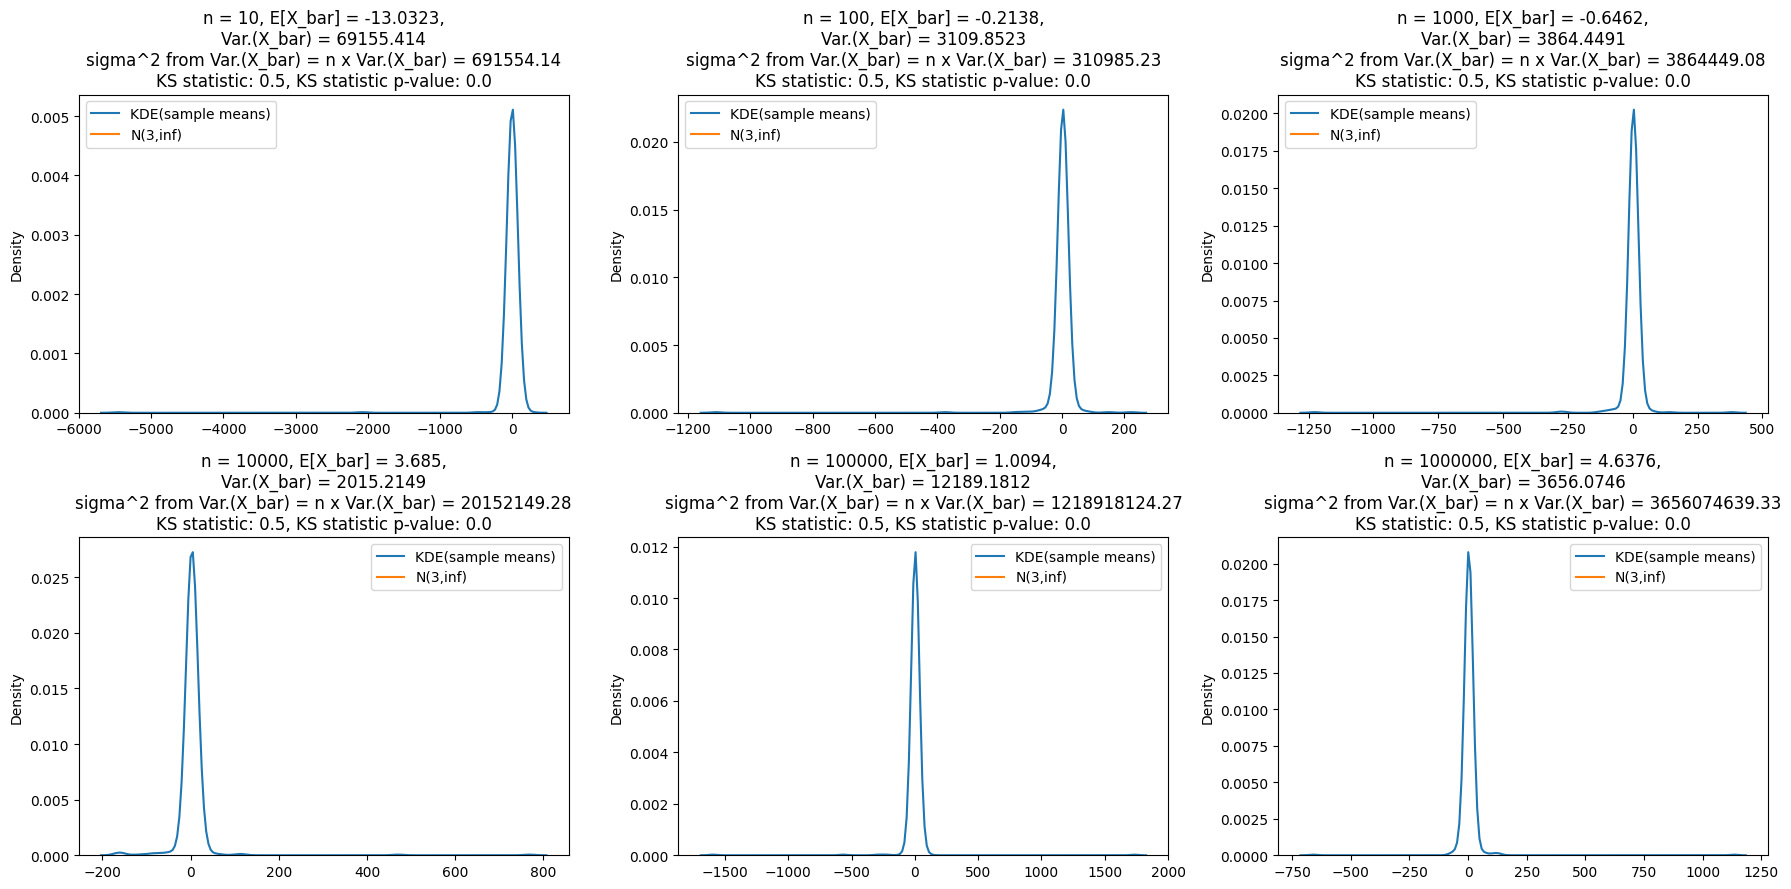

In [11]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
x_0, gamma = 3, 2
cauchy_mu, cauchy_sigma = x_0, np.inf
print(f"For a population having an exponential distribution:"
    f"\n mean = {cauchy_mu}, variance = {cauchy_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Cauchy(x_0 = {x_0}, gamma = {gamma}) + calculating sample mean"):
        sample_means.append(cauchy.rvs(loc = x_0, scale=gamma, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = cauchy_mu
    sample_mean_clt_std = cauchy_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

# Impact of Bessel Correction

- the following example assumes a normal distribution
- both the naive variance and the bessel corrected variance are observed across different samples of different sizes

In [13]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

# normal distribution
mu, sigma = 2, 3
print(f"For a population belonging to N({mu}, {sigma ** 2}):")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample = norm.rvs(loc = mu, scale = sigma, size = sz_)
    sample_naive_variance = round(sample.std() ** 2, 1) # ddof = 0
    sample_bessel_corrected_variance = round(sample.std(ddof = 1) ** 2 , 1) # ddof = 1
    print(f" For sample size = {sz_}, naive variance = {sample_naive_variance}, bessel corrected variance = {sample_bessel_corrected_variance}")

For a population belonging to N(2, 9):
 For sample size = 10, naive variance = 4.2, bessel corrected variance = 4.7
 For sample size = 100, naive variance = 7.2, bessel corrected variance = 7.3
 For sample size = 1000, naive variance = 8.8, bessel corrected variance = 8.8
 For sample size = 10000, naive variance = 9.0, bessel corrected variance = 9.0
 For sample size = 100000, naive variance = 9.0, bessel corrected variance = 9.0
 For sample size = 1000000, naive variance = 9.0, bessel corrected variance = 9.0


For the same sample size:
- Compare distributions of naive vs bessel corrected variance
- observe the expected value of these two random variables

## Normal distribution

Normal Distribution $\mathcal{N}(0, 1)$

In [12]:
np.random.seed(42)
sample_size = 1000

sample_naive_variances, sample_bessel_corrected_variances = [], []
sample_sizes = [2, 5, 20, 80, 200, 900, 1500, 100000]
for sample_size in sample_sizes:
    for _ in range(500):
        sample = norm.rvs(0, 1, size=sample_size)
        sample_naive_variances.append(sample.std() ** 2)
        sample_bessel_corrected_variances.append(sample.std(ddof = 1) ** 2)

    print(f"for n = {sample_size}: E[naive sample variance] = {np.mean(sample_naive_variances).round(4)}, E[bessel corrected sample variance] = {np.mean(sample_bessel_corrected_variances).round(4)}")

for n = 2: E[naive sample variance] = 0.4917, E[bessel corrected sample variance] = 0.9834
for n = 5: E[naive sample variance] = 0.6465, E[bessel corrected sample variance] = 0.9925
for n = 20: E[naive sample variance] = 0.749, E[bessel corrected sample variance] = 0.9964
for n = 80: E[naive sample variance] = 0.8088, E[bessel corrected sample variance] = 0.9975
for n = 200: E[naive sample variance] = 0.8462, E[bessel corrected sample variance] = 0.9981
for n = 900: E[naive sample variance] = 0.8719, E[bessel corrected sample variance] = 0.9988
for n = 1500: E[naive sample variance] = 0.8904, E[bessel corrected sample variance] = 0.9992
for n = 100000: E[naive sample variance] = 0.9041, E[bessel corrected sample variance] = 0.9993


- So even for n = 2 and n = 5 (so small samples), the bessel corrected sample variance is much more closer to the population variance than the naive sample variance
- Hence, **bessel corrected sample variance** is truly the **unbiased estimator** of **population variance**.

## Uniform
Lets now see for a uniform distribution: $Uniform(-1, 5)$

In [26]:
# set seed for ensuring repeatability
np.random.seed(42)

# distribution parameters
uniform_a, uniform_b = -1, 5

print(f"Population variance = {((uniform_b - uniform_a) ** 2)/12}, standard deviation = {np.sqrt(((uniform_b - uniform_a) ** 2)/12).round(3)}")

sample_size = 1000
sample_naive_variances, sample_bessel_corrected_variances = [], []
sample_sizes = [2, 5, 20, 80, 200, 900, 1500, 100000]
for sample_size in sample_sizes:
    for _ in range(500):
        
        # for a uniform distribution [a,b] , log = a, scale = b-a
        sample = uniform.rvs(loc=uniform_a, scale=uniform_b - uniform_a, size=sample_size)

        sample_naive_variances.append(sample.std() ** 2)
        sample_bessel_corrected_variances.append(sample.std(ddof = 1) ** 2)

    print(f"for n = {sample_size}: E[naive sample variance] = {np.mean(sample_naive_variances).round(4)}, E[bessel corrected sample variance] = {np.mean(sample_bessel_corrected_variances).round(4)}")

Population variance = 3.0, standard deviation = 1.732
for n = 2: E[naive sample variance] = 1.5072, E[bessel corrected sample variance] = 3.0144
for n = 5: E[naive sample variance] = 1.9556, E[bessel corrected sample variance] = 3.0096
for n = 20: E[naive sample variance] = 2.2534, E[bessel corrected sample variance] = 3.0061
for n = 80: E[naive sample variance] = 2.4292, E[bessel corrected sample variance] = 3.003
for n = 200: E[naive sample variance] = 2.5403, E[bessel corrected sample variance] = 3.0024
for n = 900: E[naive sample variance] = 2.6158, E[bessel corrected sample variance] = 3.0014
for n = 1500: E[naive sample variance] = 2.67, E[bessel corrected sample variance] = 3.0009
for n = 100000: E[naive sample variance] = 2.7112, E[bessel corrected sample variance] = 3.0007


Even in a uniform distribution, this holds true.

## Cauchy Distribution
Lets try in a Cauchy distribution

In [29]:
# set seed for ensuring repeatability
np.random.seed(42)

# distribution parameters
x_0, gamma = 1, 4

print(f"Population variance is infinite theoretically.")

sample_size = 1000
sample_naive_variances, sample_bessel_corrected_variances = [], []
sample_sizes = [2, 5, 20, 80, 200, 900, 1500, 100000]
for sample_size in sample_sizes:
    for _ in range(500):
        sample = cauchy.rvs(loc=x_0, scale=gamma, size=sample_size)
        sample_naive_variances.append(sample.std() ** 2)
        sample_bessel_corrected_variances.append(sample.std(ddof = 1) ** 2)

    print(f"for n = {sample_size}: E[naive sample variance] = {np.mean(sample_naive_variances).round(4)}, E[bessel corrected sample variance] = {np.mean(sample_bessel_corrected_variances).round(4)}")

Population variance is infinite theoretically.
for n = 2: E[naive sample variance] = 10644.5019, E[bessel corrected sample variance] = 21289.0037
for n = 5: E[naive sample variance] = 1937875.6667, E[bessel corrected sample variance] = 2426336.2716
for n = 20: E[naive sample variance] = 1374077.2511, E[bessel corrected sample variance] = 1704041.8722
for n = 80: E[naive sample variance] = 1431907.8282, E[bessel corrected sample variance] = 1684461.6724
for n = 200: E[naive sample variance] = 1314962.1087, E[bessel corrected sample variance] = 1517856.6204
for n = 900: E[naive sample variance] = 3948960.6219, E[bessel corrected sample variance] = 4121213.0846
for n = 1500: E[naive sample variance] = 5326518.3146, E[bessel corrected sample variance] = 5475458.6094
for n = 100000: E[naive sample variance] = 363687866.2379, E[bessel corrected sample variance] = 363821779.3034


# Gamma Distribution

## Gamma Function
$\Gamma(z) = \int\limits_{0}^{\infty} x^{z-1}e^{-x} dx$


Lets inspect how does the function being integrated, i.e. $x^{z-1}e^{-x}$ look like

In [30]:
def gamma_fn_derivative(z, x):
    return (x ** (z-1)) * np.exp(-x)

x = np.linspace(0, 100, 1000)
z = np.arange(1, 11, 1)

go_fig = make_subplots(rows=2, cols=1, subplot_titles=("Animated: Gamma Derivative", "Static: Gamma function = (x-1)!"))

gamma_fn_values = []
for z_idx in range(z.shape[0]):
    z_ = z[z_idx]
    gamma_fn_derivative_values = gamma_fn_derivative(z=z_, x=x)
    
    gamma_fn_values.append(np.trapz(gamma_fn_derivative_values, x)) # trapezoidal rule: approximation of actual integral
    # gamma_fn_values.append(quad(lambda x: gamma_fn_derivative(z_, x), 0, 100))

    # make only the first z-value plot visible by default
    go_fig.add_trace(go.Scatter(x=x, y=gamma_fn_derivative_values, visible = (z_idx == 0)), row=1, col=1)


# add the gamma function static plot
go_fig.add_trace(go.Scatter(x=z, y=gamma_fn_values), row=2, col=1)

steps = []
for z_idx, z_ in enumerate(z):
    curr_step = dict(
        method = 'update',
        args = [{
            'visible': [j == z_idx for j in range(z.shape[0])] + [True] # the last trace, that's static, needs to be visible always
        },
        {
            'title': f"For Gamma({z_})'"
        }]
    )
    steps.append(curr_step)

sliders = [
    dict(
        active = 0,
        currentvalue = {'prefix': 'k '},
        pad={'t': 50},
        steps=steps
    )
]
go_fig.update_layout(
    title='Animation of Derivative of Gamma as z varies',
    sliders = sliders,
    width = 1600,
    height = 800
)
go_fig.show()

Lets try the gamma function but for continuous values of z

In [24]:
def gamma_fn_derivative(z, x):
    return (x ** (z-1)) * np.exp(-x)

x = np.linspace(0, 100, 1000)
z = np.linspace(1, 10, 20)

go_fig = make_subplots(rows=2, cols=1, subplot_titles=("Animated: Gamma Derivative", "Static: Gamma function = (x-1)!"))

gamma_fn_values = []
for z_idx in range(z.shape[0]):
    z_ = z[z_idx]
    gamma_fn_derivative_values = gamma_fn_derivative(z=z_, x=x)
    
    gamma_fn_values.append(np.trapz(gamma_fn_derivative_values, x)) # trapezoidal rule: approximation of actual integral
    # gamma_fn_values.append(quad(lambda x: gamma_fn_derivative(z_, x), 0, 100))

    # make only the first z-value plot visible by default
    go_fig.add_trace(go.Scatter(x=x, y=gamma_fn_derivative_values, visible = (z_idx == 0)), row=1, col=1)


# add the gamma function static plot
go_fig.add_trace(go.Scatter(x=z, y=gamma_fn_values, mode='lines+markers'), row=2, col=1)

steps = []
for z_idx, z_ in enumerate(z):
    curr_step = dict(
        method = 'update',
        args = [{
            'visible': [j == z_idx for j in range(z.shape[0])] + [True] # the last trace, that's static, needs to be visible always
        },
        {
            'title': f"For Gamma({z_.round(3)})'"
        }]
    )
    steps.append(curr_step)

sliders = [
    dict(
        active = 0,
        currentvalue = {'prefix': 'k '},
        pad={'t': 50},
        steps=steps
    )
]
go_fig.update_layout(
    title='Animation of Derivative of Gamma as z varies',
    sliders = sliders,
    width = 1400,
    height = 800
)
go_fig.show()

## Foundational integral of the Gamma Function
- Euler in an attempt to represent the factorial for continuous and complex values as a definite integral in a **unit interval** , tested out the following integral\
$I = \int\limits_0^1 (-lns)^n ds$
- the following transformation was applied:
    - $u = -ln(s) \rightarrow s = e^{-u} \rightarrow ds = -e^{-u}du$
    - since $s$ went from 0 to 1, $u$ will go from $\infty$ to 0 (order of integration imparts sign, hence to remain consistent w.r.t. sign)
    - $I = \int\limits_{\infty}^0 -u^n .e^{-u} du = \int\limits_0^{\infty} u^n .e^{-u} du = \Gamma(n+1)$

Lets see what's so special about:
- negative natural log between 0 and 1
- the exponential negative natural log between 0 and 1

In [23]:
x = np.linspace(0, 1, 500)
n_arr = np.arange(1, 6)
negative_log_exponents = (-np.log(x)) ** n_arr[:, np.newaxis]

# initialise graphic objects figure (plotly)
go_fig = go.Figure()

# add traces, i.e. plots per n value
for idx, n_val in enumerate(n_arr):
    go_fig.add_trace(go.Scatter(x=x, y=negative_log_exponents[idx, :], visible = idx == 0))

steps = []
for n_idx, n_val in enumerate(n_arr):
    curr_step = dict(
        method = 'update',
        args = [{
            'visible': [j == n_idx for j in range(n_arr.shape[0])]
        },
        {
            'title': f"For n = {n_val}"
        }]
    )
    steps.append(curr_step)

sliders = [
    dict(
        active = 0,
        currentvalue = {'prefix': 'k '},
        pad={'t': 50},
        steps=steps
    )
]
go_fig.update_layout(
    title='Animation of exponential negative log',
    sliders = sliders
)
go_fig.show()

/var/folders/w9/wpf4tzps31g9gkyyfw7j56c00000gn/T/ipykernel_6492/1782676370.py:3: RuntimeWarning:

divide by zero encountered in log



## Gamma Distribution - P.D.F.

$f_X(\beta, k) = \dfrac{\beta^kx^{k-1}e^{-\beta x}}{\Gamma(k)} \,,\, x > 0$
    - $k$: shape parameter, $\beta:$ rate parameter
- obtained by summing k R.V.s , each independent and exponentially distributed by the same rate parameter, $\beta$
    - $S$ is Gamma distributed if $S = \sum\limits_{i=1}^k X_i$, where $f_{X_i}(x) = \begin{cases}\beta e^{-\beta x} & x > 0 \\ 0 & \textrm{ otherwise } \end{cases}$
- why $x > 0$
    - definitionally, all R.V.s that form the sum are themselves non-negative
    - 